In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [5]:
def load_csv_datatype(path_to_file: str, 
                      n_scans: int= 1,
                      energy_key: str = 'Energy(meas)',
                      dim_name: str = 'eV') -> xr.DataArray:
    """
    This function load a dataset in the csv format using pandas.
    the number of scans need to be manually insered. 
    If multiple scans are present the mean is considered 
    """

    df = pd.read_csv(path_to_file, skiprows=1, sep='\t')

    scan_list = [f'Scan{i}' for i in range(1,n_scans+1)]
    loaded_data = df[scan_list].mean(axis=1).to_numpy()
    
    #loaded_data = [df[key].to_numpy().T for key in scan_list]

    coords = {dim_name : df[energy_key].to_numpy()}

    return xr.DataArray(
        loaded_data,
        coords=coords,
        dims=dim_name,
        # attrs={...} <- attributes here
    )

In [6]:
load_csv_datatype("data/Al_Mg_50V_fullspctra")

<xarray.DataArray (eV: 2341)>
array([1021.,  815.,  847., ..., 7427., 7507., 7530.])
Coordinates:
  * eV       (eV) float64 1.285e+03 1.285e+03 1.284e+03 ... 131.0 130.4 129.8

In [11]:
fullspectra_Al=pd.read_csv("data/Al_Sm_50V_fullspctra", sep="\t", skiprows=1)
fullspectra_Mg=pd.read_csv("data/Mg_Sm_50V_fullspctra", sep="\t", skiprows=1)

In [12]:
fullspectra_Mgenergy=fullspectra_Mg["Energy(meas)"]
fullspectra_Mgcounts=fullspectra_Mg["Sum"]
fullspectra_Alenergy=fullspectra_Al["Energy(meas)"] 
fullspectra_Alcounts=fullspectra_Al["Sum"]

In [13]:
fermilevel_Al=np.load('results/Al_Ag_50V_fermilevel.npy')
fermilevel_Mg=np.load('results/Mg_Ag_50V_fermilevel.npy')

workfunction_Al=fermilevel_Al
workfunction_Mg=fermilevel_Mg

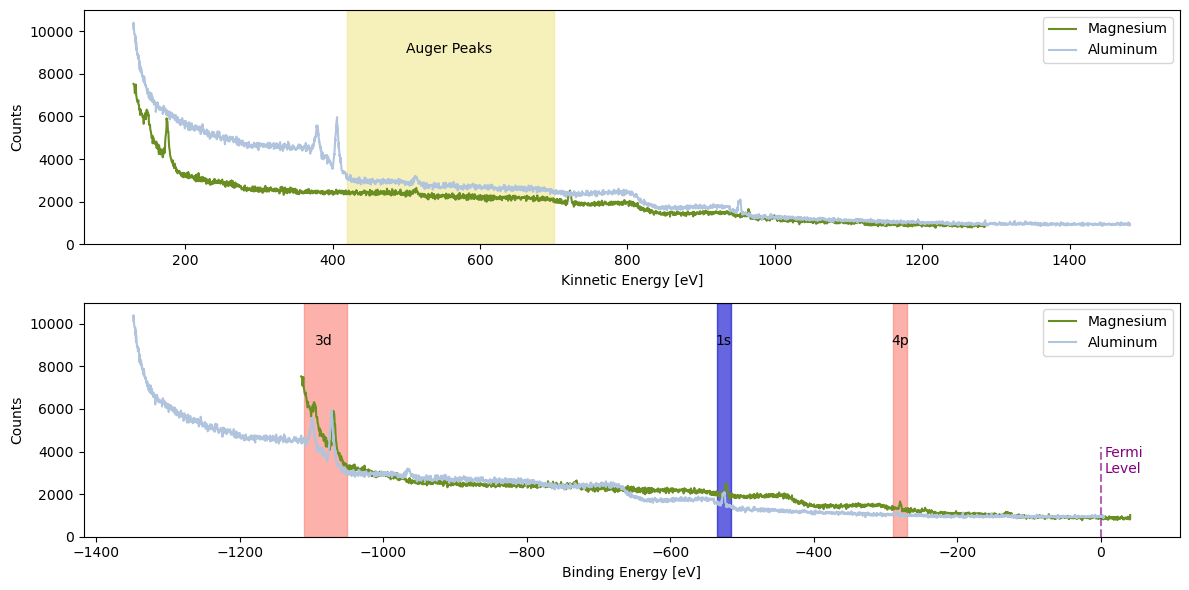

In [57]:
fig, ax = plt.subplots(2,1, figsize=(12, 6))
ax[0].plot(fullspectra_Mgenergy, fullspectra_Mgcounts,
            color="olivedrab", label="Magnesium")
ax[0].plot(fullspectra_Alenergy, fullspectra_Alcounts,
           color="lightsteelblue", label="Aluminum")
ax[0].set_xlabel("Kinnetic Energy [eV]")
ax[0].set_ylabel("Counts")
ax[0].legend()
ax[0].set_ylim(0,11000)
ax[0].fill_betweenx([0,11000], 420, 700,
                    color='khaki', alpha=0.6)
ax[0].text(500, 9000, "Auger Peaks")


ax[1].set_ylim(0,11000)
ax[1].plot(fullspectra_Mgenergy-fermilevel_Mg[0], fullspectra_Mgcounts,
            color="olivedrab", label="Magnesium")
ax[1].plot(fullspectra_Alenergy-fermilevel_Al[0], fullspectra_Alcounts,
              color="lightsteelblue", label="Aluminum")
ax[1].set_xlabel("Binding Energy [eV]")
ax[1].set_ylabel("Counts")

ax[1].fill_betweenx([0,11000], -1110, -1050,
                    color="salmon", alpha=0.6)
ax[1].text(-1095, 9000, "3d")
ax[1].fill_betweenx([0,11000], -535, -515,
                    color="mediumblue", alpha=0.6)
ax[1].text(-537, 9000, "1s")
ax[1].fill_betweenx([0,11000], -290, -270,
                    color="salmon", alpha=0.6)
ax[1].text(-292, 9000, "4p")

ax[1].vlines(0,0,4200,
              color="purple", linestyle="dashed", alpha=0.6)
ax[1].text(5, 3000, "Fermi\nLevel",
           color="purple")
ax[1].legend()


fig.tight_layout()

In [28]:
fermilevel_Al

array([1.47761674e+03, 5.04224789e-01])